cd ~/Downloads streamlit  
streamlit run app.py

## 1. Load and Preprocess Data

In [12]:
import pandas as pd
churn_df = pd.read_csv("spotify_churn_32000.csv")
churn_df = churn_df.drop_duplicates()

# apply dropna()
churn_df = churn_df.dropna()
print (f"Shape of data {churn_df.shape}")
churn_df.head()

Shape of data (32000, 12)


,user_id,gender,age,country,subscription_type,listening_time,songs_played_per_day,skip_rate,device_type,ads_listened_per_week,offline_listening,is_churned
0,8001,Male,66,IN,Premium,84,54,0.174894,Desktop,0,0,0
1,8002,Male,56,US,Family,1,23,0.099244,Desktop,0,0,0
2,8003,Other,26,FR,Student,1,44,0.195300,Desktop,0,0,0
3,8004,Other,59,FR,Premium,37,31,0.301560,Desktop,0,0,0
4,8005,Other,21,AU,Family,102,30,0.501183,Web,0,0,1


## 2. Feature Engineering

### 2.1 Separate features and label columns

In [13]:
# Features
churn_features_df = churn_df[['gender','age','country','subscription_type','listening_time','songs_played_per_day','skip_rate','device_type','ads_listened_per_week','offline_listening']]

# Label
churn_label_df = churn_df[['is_churned']]

# Sanity check
churn_features_df.head()
churn_label_df.head()

,is_churned
0,0
1,0
2,0
3,0
4,1


### 2.2 Identify column types

In [14]:
# Get number of unique values per categorical column
cat_cols = churn_features_df.select_dtypes(include=['object', 'category']).columns

for col in cat_cols:
    unique_count = churn_features_df[col].nunique()
    print(f"{col}: {unique_count} unique values")

# Get number of unique values per numerical column
num_cols = churn_features_df.select_dtypes(include=['int64', 'float64']).columns

print()
for col in num_cols:
    unique_count = churn_features_df[col].nunique()
    print(f"{col}: {unique_count} unique values")

gender: 3 unique values
country: 8 unique values
subscription_type: 4 unique values
device_type: 3 unique values

age: 54 unique values
listening_time: 323 unique values
songs_played_per_day: 109 unique values
skip_rate: 32000 unique values
ads_listened_per_week: 43 unique values
offline_listening: 2 unique values


### 2.3 Transform multi-class categorical features into lists

In [15]:
# Multi-class categorical features
mc_features_columns = ['gender','country','subscription_type','device_type']

# Transform columns to lists
columns_to_list = []

for col in mc_features_columns:
  to_list = churn_features_df[col].to_list()
  columns_to_list.append(to_list)

# Sanity check
print(columns_to_list)
print(len(columns_to_list))

[['Male', 'Male', 'Other', 'Other', 'Other', 'Male', 'Other', 'Female', 'Female', 'Male', 'Female', 'Female', 'Other', 'Other', 'Male', 'Other', 'Female', 'Other', 'Other', 'Male', 'Male', 'Male', 'Male', 'Other', 'Female', 'Male', 'Female', 'Male', 'Male', 'Female', 'Male', 'Male', 'Female', 'Male', 'Female', 'Male', 'Male', 'Female', 'Female', 'Male', 'Other', 'Other', 'Other', 'Other', 'Male', 'Male', 'Male', 'Female', 'Male', 'Female', 'Other', 'Other', 'Male', 'Male', 'Other', 'Female', 'Female', 'Female', 'Male', 'Other', 'Male', 'Female', 'Other', 'Female', 'Male', 'Male', 'Female', 'Other', 'Female', 'Female', 'Other', 'Other', 'Female', 'Male', 'Male', 'Male', 'Other', 'Female', 'Other', 'Male', 'Female', 'Other', 'Other', 'Other', 'Male', 'Female', 'Male', 'Male', 'Female', 'Other', 'Female', 'Male', 'Male', 'Female', 'Male', 'Male', 'Other', 'Female', 'Female', 'Female', 'Male', 'Other', 'Other', 'Other', 'Other', 'Other', 'Female', 'Female', 'Male', 'Female', 'Other', 'Fema

### 2.4 Transform multi-class categorical features into list of lists

In [16]:
# hot vector using scikit-learn


mc_columns_to_list_of_lists = []

for lst in columns_to_list:
    new_lst = []
    for val in lst:
      new_lst.append([val])
    mc_columns_to_list_of_lists.append(new_lst)


# Sanity check
print(mc_columns_to_list_of_lists)
print(len(mc_columns_to_list_of_lists))

[[['Male'], ['Male'], ['Other'], ['Other'], ['Other'], ['Male'], ['Other'], ['Female'], ['Female'], ['Male'], ['Female'], ['Female'], ['Other'], ['Other'], ['Male'], ['Other'], ['Female'], ['Other'], ['Other'], ['Male'], ['Male'], ['Male'], ['Male'], ['Other'], ['Female'], ['Male'], ['Female'], ['Male'], ['Male'], ['Female'], ['Male'], ['Male'], ['Female'], ['Male'], ['Female'], ['Male'], ['Male'], ['Female'], ['Female'], ['Male'], ['Other'], ['Other'], ['Other'], ['Other'], ['Male'], ['Male'], ['Male'], ['Female'], ['Male'], ['Female'], ['Other'], ['Other'], ['Male'], ['Male'], ['Other'], ['Female'], ['Female'], ['Female'], ['Male'], ['Other'], ['Male'], ['Female'], ['Other'], ['Female'], ['Male'], ['Male'], ['Female'], ['Other'], ['Female'], ['Female'], ['Other'], ['Other'], ['Female'], ['Male'], ['Male'], ['Male'], ['Other'], ['Female'], ['Other'], ['Male'], ['Female'], ['Other'], ['Other'], ['Other'], ['Male'], ['Female'], ['Male'], ['Male'], ['Female'], ['Other'], ['Female'], ['Ma

### 2.5 Transform multi-class categorical features into 1-hot encodings

In [17]:
#  import  OneHotEncoder class from scikit-learn preprocessing
from sklearn.preprocessing import OneHotEncoder

# Store  results
encoder_lst = []

# Fit our data
for lst in mc_columns_to_list_of_lists:
  encoder = OneHotEncoder()
  encoding = encoder.fit(lst)
  encoder_lst.append(encoding)
  print(f"Unique vocabulary items {len(encoder.categories_[0])}\n")

# Now transform each example in our data into 1-hot form and into a matrix
for i in range(4):
  if i == 0:
    gender_transformed = encoder_lst[i].transform(mc_columns_to_list_of_lists[i])
    gender_transformed = gender_transformed.toarray()
    print(gender_transformed)
  elif i == 1:
    country_transformed = encoder_lst[i].transform(mc_columns_to_list_of_lists[i])
    country_transformed = country_transformed.toarray()
    print(country_transformed)
  elif i == 2:
    subscription_type_transformed = encoder_lst[i].transform(mc_columns_to_list_of_lists[i])
    subscription_type_transformed = subscription_type_transformed.toarray()
    print(subscription_type_transformed)
  else:
    device_type_transformed = encoder_lst[i].transform(mc_columns_to_list_of_lists[i])
    device_type_transformed = device_type_transformed.toarray()
    print(device_type_transformed)

Unique vocabulary items 3

Unique vocabulary items 8

Unique vocabulary items 4

Unique vocabulary items 3

[[0. 1. 0.]
 [0. 1. 0.]
 [0. 0. 1.]
 ...
 [1. 0. 0.]
 [0. 0. 1.]
 [0. 1. 0.]]
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 1.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 1. ... 0. 0. 0.]
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]]
[[0. 0. 1. 0.]
 [1. 0. 0. 0.]
 [0. 0. 0. 1.]
 ...
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [0. 1. 0. 0.]]
[[1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 ...
 [0. 0. 1.]
 [0. 1. 0.]
 [1. 0. 0.]]


### 2.6 Create dataframes back from the arrays

In [18]:
# gender column
gender_transformed_df = pd.DataFrame(gender_transformed)
gender_transformed_df.head()

# country column
country_transformed_df = pd.DataFrame(country_transformed)
country_transformed_df.head()

# sub type column
subscription_type_transformed_df = pd.DataFrame(subscription_type_transformed)
subscription_type_transformed_df.head()

# device type column
device_type_transformed_df = pd.DataFrame(device_type_transformed)
device_type_transformed_df.head()



,0,1,2
0,1.0,0.0,0.0
1,1.0,0.0,0.0
2,1.0,0.0,0.0
3,1.0,0.0,0.0
4,0.0,0.0,1.0


In [19]:
import pandas as pd

#  unscaled OHE dataframe
# 1. Get original numeric features (unscaled)
numeric_cols = ['age', 'listening_time', 'songs_played_per_day', 'skip_rate', 'ads_listened_per_week', 'offline_listening']
unscaled_numerics = churn_features_df[numeric_cols]

# 2. Concatenate with the One-Hot Encoded DataFrames
ohe_preview = pd.concat([
    unscaled_numerics,
    gender_transformed_df,
    country_transformed_df,
    subscription_type_transformed_df,
    device_type_transformed_df
], axis=1)



display(ohe_preview.head())

,age,listening_time,songs_played_per_day,skip_rate,ads_listened_per_week,offline_listening,0,1,2,0,...,5,6,7,0,1,2,3,0,1,2
0,66,84,54,0.174894,0,0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
1,56,1,23,0.099244,0,0,0.0,1.0,0.0,0.0,...,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
2,26,1,44,0.195300,0,0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
3,59,37,31,0.301560,0,0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
4,21,102,30,0.501183,0,0,0.0,0.0,1.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0


### 2.7 Concatenate the transformed features back to the original dataframe

In [20]:
# Rebuild DataFrames WITH column names

gender_transformed_df = pd.DataFrame(
    gender_transformed,
    columns=[f"gender_{cat}" for cat in encoder_lst[0].categories_[0]]
)

country_transformed_df = pd.DataFrame(
    country_transformed,
    columns=[f"country_{cat}" for cat in encoder_lst[1].categories_[0]]
)

subscription_type_transformed_df = pd.DataFrame(
    subscription_type_transformed,
    columns=[f"subscription_{cat}" for cat in encoder_lst[2].categories_[0]]
)

device_type_transformed_df = pd.DataFrame(
    device_type_transformed,
    columns=[f"device_{cat}" for cat in encoder_lst[3].categories_[0]]
)


In [21]:
churn_features_df.reset_index(drop=True, inplace=True)
gender_transformed_df.reset_index(drop=True, inplace=True)
country_transformed_df.reset_index(drop=True, inplace=True)
subscription_type_transformed_df.reset_index(drop=True, inplace=True)
device_type_transformed_df.reset_index(drop=True, inplace=True)

# Concatenate everything at once
churn_features_transformed_df = pd.concat(
    [churn_features_df, gender_transformed_df, country_transformed_df, subscription_type_transformed_df, device_type_transformed_df],
    axis=1
)

churn_features_transformed_df.shape
churn_features_transformed_df.head()

,gender,age,country,subscription_type,listening_time,songs_played_per_day,skip_rate,device_type,ads_listened_per_week,offline_listening,...,country_PK,country_UK,country_US,subscription_Family,subscription_Free,subscription_Premium,subscription_Student,device_Desktop,device_Mobile,device_Web
0,Male,66,IN,Premium,84,54,0.174894,Desktop,0,0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
1,Male,56,US,Family,1,23,0.099244,Desktop,0,0,...,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
2,Other,26,FR,Student,1,44,0.195300,Desktop,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
3,Other,59,FR,Premium,37,31,0.301560,Desktop,0,0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
4,Other,21,AU,Family,102,30,0.501183,Web,0,0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0


### 2.8 Drop the original columns

In [22]:
churn_features_transformed_df = churn_features_transformed_df.drop(columns=['gender', 'country', 'subscription_type', 'device_type'], axis=1)

churn_features_transformed_df.head()

,age,listening_time,songs_played_per_day,skip_rate,ads_listened_per_week,offline_listening,gender_Female,gender_Male,gender_Other,country_AU,...,country_PK,country_UK,country_US,subscription_Family,subscription_Free,subscription_Premium,subscription_Student,device_Desktop,device_Mobile,device_Web
0,66,84,54,0.174894,0,0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
1,56,1,23,0.099244,0,0,0.0,1.0,0.0,0.0,...,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
2,26,1,44,0.195300,0,0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
3,59,37,31,0.301560,0,0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
4,21,102,30,0.501183,0,0,0.0,0.0,1.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0


### 2.9 Feature Scaling on Non-Binary Columns via StandardScaler

In [23]:
#  convert all feature column names to strings
churn_features_transformed_df.columns = churn_features_transformed_df.columns.astype(str)

# Apply scaler
from sklearn.preprocessing import StandardScaler

numeric_cols = ['age', 'listening_time', 'songs_played_per_day', 'skip_rate', 'ads_listened_per_week']

scaler = StandardScaler()
churn_features_transformed_df[numeric_cols] = scaler.fit_transform(churn_features_transformed_df[numeric_cols])


churn_features_transformed_df.head()

,age,listening_time,songs_played_per_day,skip_rate,ads_listened_per_week,offline_listening,gender_Female,gender_Male,gender_Other,country_AU,...,country_PK,country_UK,country_US,subscription_Family,subscription_Free,subscription_Premium,subscription_Student,device_Desktop,device_Mobile,device_Web
0,1.508021,-0.612864,0.731284,-0.699455,-0.500952,0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
1,0.866370,-2.026359,-0.857426,-1.172758,-0.500952,0,0.0,1.0,0.0,0.0,...,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
2,-1.058584,-2.026359,0.218797,-0.571783,-0.500952,0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
3,1.058865,-1.413277,-0.447436,0.093032,-0.500952,0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
4,-1.379410,-0.306322,-0.498685,1.341973,-0.500952,0,0.0,0.0,1.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0


## 3. Data pre-processing and splitting for cross-validation

In [24]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold

# data store in x_test, y_test
features = churn_features_transformed_df.to_numpy()
labels = churn_label_df.to_numpy()
_x, x_test, _y, y_test = train_test_split(features, labels, test_size=0.10, random_state=42)

# set k = 10
k = 10

kfold_spliiter = KFold(n_splits=k)

folds_data = [] # this is an inefficient way but still do it

fold = 1
for train_index, validation_index in kfold_spliiter.split(_x):
    x_train , x_valid = _x[train_index,:],_x[validation_index,:]
    y_train , y_valid = _y[train_index,:] , _y[validation_index,:]
    print (f"Fold {fold} training data shape = {(x_train.shape,y_train.shape)}")
    print (f"Fold {fold} validation data shape = {(x_valid.shape,y_valid.shape)}")
    fold+=1
    folds_data.append((x_train,y_train,x_valid,y_valid))

Fold 1 training data shape = ((25920, 24), (25920, 1))
Fold 1 validation data shape = ((2880, 24), (2880, 1))
Fold 2 training data shape = ((25920, 24), (25920, 1))
Fold 2 validation data shape = ((2880, 24), (2880, 1))
Fold 3 training data shape = ((25920, 24), (25920, 1))
Fold 3 validation data shape = ((2880, 24), (2880, 1))
Fold 4 training data shape = ((25920, 24), (25920, 1))
Fold 4 validation data shape = ((2880, 24), (2880, 1))
Fold 5 training data shape = ((25920, 24), (25920, 1))
Fold 5 validation data shape = ((2880, 24), (2880, 1))
Fold 6 training data shape = ((25920, 24), (25920, 1))
Fold 6 validation data shape = ((2880, 24), (2880, 1))
Fold 7 training data shape = ((25920, 24), (25920, 1))
Fold 7 validation data shape = ((2880, 24), (2880, 1))
Fold 8 training data shape = ((25920, 24), (25920, 1))
Fold 8 validation data shape = ((2880, 24), (2880, 1))
Fold 9 training data shape = ((25920, 24), (25920, 1))
Fold 9 validation data shape = ((2880, 24), (2880, 1))
Fold 10 tr

## 4. Model cross validation, identifying best model and testing the best model on test data

In [25]:
#
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# LR with no regularizer
lr_vanilla = LogisticRegression(penalty=None)
# LR with L2 regularizer
lr_L2 = LogisticRegression(penalty="l2")
# LR with L1 regularizer
lr_L1 = LogisticRegression(penalty="l1", solver='liblinear')
# LR with L1+L2 regularizer
lr_L1_L2 = LogisticRegression(penalty="elasticnet", l1_ratio=0.5, solver="saga")
# SVC with Linear Kernel
svm_linear = SVC(kernel="linear")
# SVC with Polynomial Kernel
svm_poly = SVC(kernel="poly",degree=2)

# Keep all the models in a dictionary

all_models = {"lr_vanilla":lr_vanilla,
              "lr_L2":lr_L2,
              "lr_L1":lr_L1,
              "lr_L1_L2":lr_L1_L2,
              "svm_linear":svm_linear,
              "svm_poly":svm_poly}

### 4.1 K-fold Cross Validation

In [26]:
best_validation_accuracy = 0
best_model_name = ""
best_model = None

# Iterate over all models
for model_name in all_models.keys():

    print (f"Evaluating {model_name} ...")
    model = all_models[model_name]

    # store training and validation accuracies
    train_acc_for_all_folds = []
    valid_acc_for_all_folds = []

    #Iterate over all folds
    for i, fold in enumerate(folds_data):
        x_train, y_train, x_valid, y_valid = fold

        # Train the model
        _ = model.fit(x_train,y_train.flatten())

        # Evluate model on training data
        y_pred_train = model.predict(x_train)

        # Evaluate the model on validation data
        y_pred_valid = model.predict(x_valid)

        # Compute training accuracy
        print (y_pred_train.shape)
        print (y_train.shape)
        print (y_pred_valid.shape)
        print (y_valid.shape)
        train_acc = accuracy_score(y_pred_train , y_train)

        # Store training accuracy for each folds
        train_acc_for_all_folds.append(train_acc)

        # Compute validation accuracy
        valid_acc = accuracy_score(y_pred_valid , y_valid.flatten())

        # Store validation accuracy for each folds
        valid_acc_for_all_folds.append(valid_acc)

    #average training accuracy across k folds
    avg_training_acc = sum(train_acc_for_all_folds)/k

    print (f"Average training accuracy for model {model_name} = {avg_training_acc}")

    #average validation accuracy across k folds
    avg_validation_acc = sum(valid_acc_for_all_folds)/k

    print (f"Average validation accuracy for model {model_name} = {avg_validation_acc}")

    # Select best model based on average validation accuracy
    if avg_validation_acc > best_validation_accuracy:
        best_validation_accuracy = avg_validation_acc
        best_model_name = model_name
        best_model = model
    print (f"-----------------------------------")

print (f"Best model for the task is {best_model_name} which offers the validation accuracy of {best_validation_accuracy}")

Evaluating lr_vanilla ...
(25920,)
(25920, 1)
(2880,)
(2880, 1)
(25920,)
(25920, 1)
(2880,)
(2880, 1)
(25920,)
(25920, 1)
(2880,)
(2880, 1)
(25920,)
(25920, 1)
(2880,)
(2880, 1)
(25920,)
(25920, 1)
(2880,)
(2880, 1)
(25920,)
(25920, 1)
(2880,)
(2880, 1)
(25920,)
(25920, 1)
(2880,)
(2880, 1)
(25920,)
(25920, 1)
(2880,)
(2880, 1)
(25920,)
(25920, 1)
(2880,)
(2880, 1)
(25920,)
(25920, 1)
(2880,)
(2880, 1)
Average training accuracy for model lr_vanilla = 0.7335493827160494
Average validation accuracy for model lr_vanilla = 0.7330208333333333
-----------------------------------
Evaluating lr_L2 ...
(25920,)
(25920, 1)
(2880,)
(2880, 1)
(25920,)
(25920, 1)
(2880,)
(2880, 1)
(25920,)
(25920, 1)
(2880,)
(2880, 1)
(25920,)
(25920, 1)
(2880,)
(2880, 1)
(25920,)
(25920, 1)
(2880,)
(2880, 1)
(25920,)
(25920, 1)
(2880,)
(2880, 1)
(25920,)
(25920, 1)
(2880,)
(2880, 1)
(25920,)
(25920, 1)
(2880,)
(2880, 1)
(25920,)
(25920, 1)
(2880,)
(2880, 1)
(25920,)
(25920, 1)
(2880,)
(2880, 1)
Average training ac

/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


(25920,)
(25920, 1)
(2880,)
(2880, 1)


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


(25920,)
(25920, 1)
(2880,)
(2880, 1)


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


(25920,)
(25920, 1)
(2880,)
(2880, 1)


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


(25920,)
(25920, 1)
(2880,)
(2880, 1)


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


(25920,)
(25920, 1)
(2880,)
(2880, 1)


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


(25920,)
(25920, 1)
(2880,)
(2880, 1)


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


(25920,)
(25920, 1)
(2880,)
(2880, 1)


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


(25920,)
(25920, 1)
(2880,)
(2880, 1)


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


(25920,)
(25920, 1)
(2880,)
(2880, 1)


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


(25920,)
(25920, 1)
(2880,)
(2880, 1)
Average training accuracy for model lr_L1_L2 = 0.7335493827160493
Average validation accuracy for model lr_L1_L2 = 0.7329861111111111
-----------------------------------
Evaluating svm_linear ...
(25920,)
(25920, 1)
(2880,)
(2880, 1)
(25920,)
(25920, 1)
(2880,)
(2880, 1)
(25920,)
(25920, 1)
(2880,)
(2880, 1)
(25920,)
(25920, 1)
(2880,)
(2880, 1)
(25920,)
(25920, 1)
(2880,)
(2880, 1)
(25920,)
(25920, 1)
(2880,)
(2880, 1)
(25920,)
(25920, 1)
(2880,)
(2880, 1)
(25920,)
(25920, 1)
(2880,)
(2880, 1)
(25920,)
(25920, 1)
(2880,)
(2880, 1)
(25920,)
(25920, 1)
(2880,)
(2880, 1)
Average training accuracy for model svm_linear = 0.728298611111111
Average validation accuracy for model svm_linear = 0.7282986111111112
-----------------------------------
Evaluating svm_poly ...
(25920,)
(25920, 1)
(2880,)
(2880, 1)
(25920,)
(25920, 1)
(2880,)
(2880, 1)
(25920,)
(25920, 1)
(2880,)
(2880, 1)
(25920,)
(25920, 1)
(2880,)
(2880, 1)
(25920,)
(25920, 1)
(2880,)
(2880, 1)

### 4.2 Storing our best model

In [27]:
# Storing
import pickle

file_to_write = open("churn_best_model.saved","wb")
pickle.dump(best_model,file_to_write)
file_to_write.close()

# Let's also store our test data which we may need to use later
file_to_write = open("test_data.dat","wb")
pickle.dump([x_test,y_test],file_to_write)
file_to_write.close()

### 4.3 Loading the best model and testing it

In [28]:
import pickle
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression

model_file = open("churn_best_model.saved","rb")
model = pickle.load(model_file)
model_file.close()

test_data_file = open("test_data.dat","rb")
x_test,y_test = pickle.load(test_data_file)
test_data_file.close()

# Test accuracy on our test dataset
y_pred_test = model.predict(x_test)

accuracy = accuracy_score(y_pred_test, y_test.flatten())

# Print accuracy on the test data

print (f"Accuracy on test data {accuracy}")

Accuracy on test data 0.7353125


In [29]:
import numpy as np
from sklearn.metrics import confusion_matrix

# 1. Verify the Threshold issue 0.5
y_pred_default = model.predict(x_test)
print(f"Default Threshold (0.5) predicted churners: {y_pred_default.sum()}")

# 2. Verify the ROC Fix (Threshold ~0.26)
# We use the threshold we calculated earlier from the ROC curve
y_scores = model.predict_proba(x_test)[:, 1]
optimal_threshold = 0.26
y_pred_tuned = (y_scores >= optimal_threshold).astype(int)

print(f"ROC-Tuned Threshold ({optimal_threshold}) predicted churners: {y_pred_tuned.sum()}")

# 3. Compare Recall (How many actual churners did we get)
churners_in_test_set = y_test.sum()
print(f"\nTotal Actual Churners in Test Set: {churners_in_test_set}")
print(f"Caught by Default: {confusion_matrix(y_test, y_pred_default)[1,1]}")
print(f"Caught by ROC Tuning: {confusion_matrix(y_test, y_pred_tuned)[1,1]}")

Default Threshold (0.5) predicted churners: 210
ROC-Tuned Threshold (0.26) predicted churners: 1426

Total Actual Churners in Test Set: 851
Caught by Default: 107
Caught by ROC Tuning: 539


### 4.4 Testing further

In [30]:
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

y_pred = model.predict(x_test)
y_prob = model.predict_proba(x_test)[:, 1]

print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
print("ROC-AUC:", roc_auc_score(y_test, y_prob))

              precision    recall  f1-score   support

           0       0.75      0.96      0.84      2349
           1       0.51      0.13      0.20       851

    accuracy                           0.74      3200
   macro avg       0.63      0.54      0.52      3200
weighted avg       0.69      0.74      0.67      3200

[[2246  103]
 [ 744  107]]
ROC-AUC: 0.6871864368116242


In [31]:
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

# Get predicted probabilities for positive class
y_prob = model.predict_proba(x_test)[:, 1]

# Apply threshold
threshold = 0.26
y_pred_custom = (y_prob >= threshold).astype(int)


print("=== Classification Report (Threshold = 0.26) ===")
print(classification_report(y_test, y_pred_custom))

print("=== Confusion Matrix (Threshold = 0.26) ===")
print(confusion_matrix(y_test, y_pred_custom))

print("ROC-AUC:", roc_auc_score(y_test, y_prob))


=== Classification Report (Threshold = 0.26) ===
              precision    recall  f1-score   support

           0       0.82      0.62      0.71      2349
           1       0.38      0.63      0.47       851

    accuracy                           0.63      3200
   macro avg       0.60      0.63      0.59      3200
weighted avg       0.71      0.63      0.65      3200

=== Confusion Matrix (Threshold = 0.26) ===
[[1462  887]
 [ 312  539]]
ROC-AUC: 0.6871864368116242


In [32]:
churn_label_df['is_churned'].value_counts()

,count
is_churned,
0,23324
1,8676


In [33]:
pd.Series(y_test.ravel()).value_counts()

,count
0,2349
1,851


In [34]:
print("\n=== Logistic Regression With Balanced Class Weights ===")

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score

# Train balanced LR model
lr_balanced = LogisticRegression(class_weight='balanced', max_iter=500)
lr_balanced.fit(_x, _y.ravel())

# Predict on test set
y_pred_balanced = lr_balanced.predict(x_test)
y_prob_balanced = lr_balanced.predict_proba(x_test)[:, 1]

print("\nClassification Report (Balanced Logistic Regression):")
print(classification_report(y_test, y_pred_balanced))

print("\nConfusion Matrix (Balanced Logistic Regression):")
print(confusion_matrix(y_test, y_pred_balanced))

print("ROC-AUC:", roc_auc_score(y_test, y_pred_balanced))



=== Logistic Regression With Balanced Class Weights ===

Classification Report (Balanced Logistic Regression):
              precision    recall  f1-score   support

           0       0.82      0.65      0.72      2349
           1       0.38      0.60      0.47       851

    accuracy                           0.64      3200
   macro avg       0.60      0.63      0.60      3200
weighted avg       0.70      0.64      0.66      3200


Confusion Matrix (Balanced Logistic Regression):
[[1529  820]
 [ 341  510]]
ROC-AUC: 0.6251051151101126


In [35]:
from sklearn.metrics import roc_curve

y_scores = model.predict_proba(x_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_scores)

# Compute Youden's J statistic
J = tpr - fpr
ix = J.argmax()
best_thresh = thresholds[ix]

print("Best threshold from ROC:", best_thresh)

y_pred_opt = (y_scores >= best_thresh).astype(int)

print(classification_report(y_test, y_pred_opt))
print(confusion_matrix(y_test, y_pred_opt))
print("ROC-AUC:", roc_auc_score(y_test, y_pred_opt))


Best threshold from ROC: 0.24762980093428974
              precision    recall  f1-score   support

           0       0.83      0.59      0.69      2349
           1       0.37      0.68      0.48       851

    accuracy                           0.61      3200
   macro avg       0.60      0.63      0.59      3200
weighted avg       0.71      0.61      0.64      3200

[[1385  964]
 [ 274  577]]
ROC-AUC: 0.6338192265228747



=== Feature Importance from Logistic Regression ===

Top 15 Features Increasing Churn:
                  feature      coef
18      subscription_Free  0.720669
3               skip_rate  0.418588
13             country_IN  0.043691
15             country_UK  0.026890
4   ads_listened_per_week  0.019372
12             country_FR  0.018311
6           gender_Female  0.006203
11             country_DE  0.000485
23             device_Web -0.001171
22          device_Mobile -0.001714
10             country_CA -0.004105
2    songs_played_per_day -0.006307
8            gender_Other -0.008280
0                     age -0.010719
5       offline_listening -0.020658

Top 15 Features Decreasing Churn:
                 feature      coef
22         device_Mobile -0.001714
10            country_CA -0.004105
2   songs_played_per_day -0.006307
8           gender_Other -0.008280
0                    age -0.010719
5      offline_listening -0.020658
16            country_US -0.030397
21        device_Desk

<Figure size 1000x600 with 0 Axes>

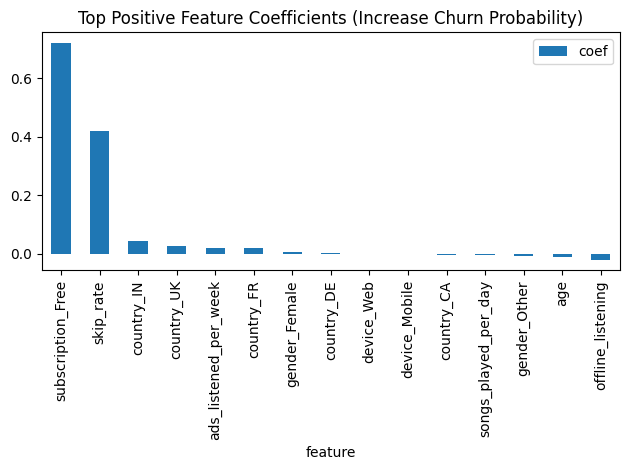

In [36]:
print("\n=== Feature Importance from Logistic Regression ===")

import pandas as pd
import matplotlib.pyplot as plt

# Extract coefficients from balanced model
coefs = lr_balanced.coef_[0]
feature_names = churn_features_transformed_df.columns

coef_df = pd.DataFrame({
    'feature': feature_names,
    'coef': coefs
}).sort_values(by='coef', ascending=False)

print("\nTop 15 Features Increasing Churn:")
print(coef_df.head(15))

print("\nTop 15 Features Decreasing Churn:")
print(coef_df.tail(15))

# Bar chart for slides
plt.figure(figsize=(10,6))
coef_df.head(15).plot(kind='bar', x='feature', y='coef')
plt.title("Top Positive Feature Coefficients (Increase Churn Probability)")
plt.tight_layout()
plt.show()


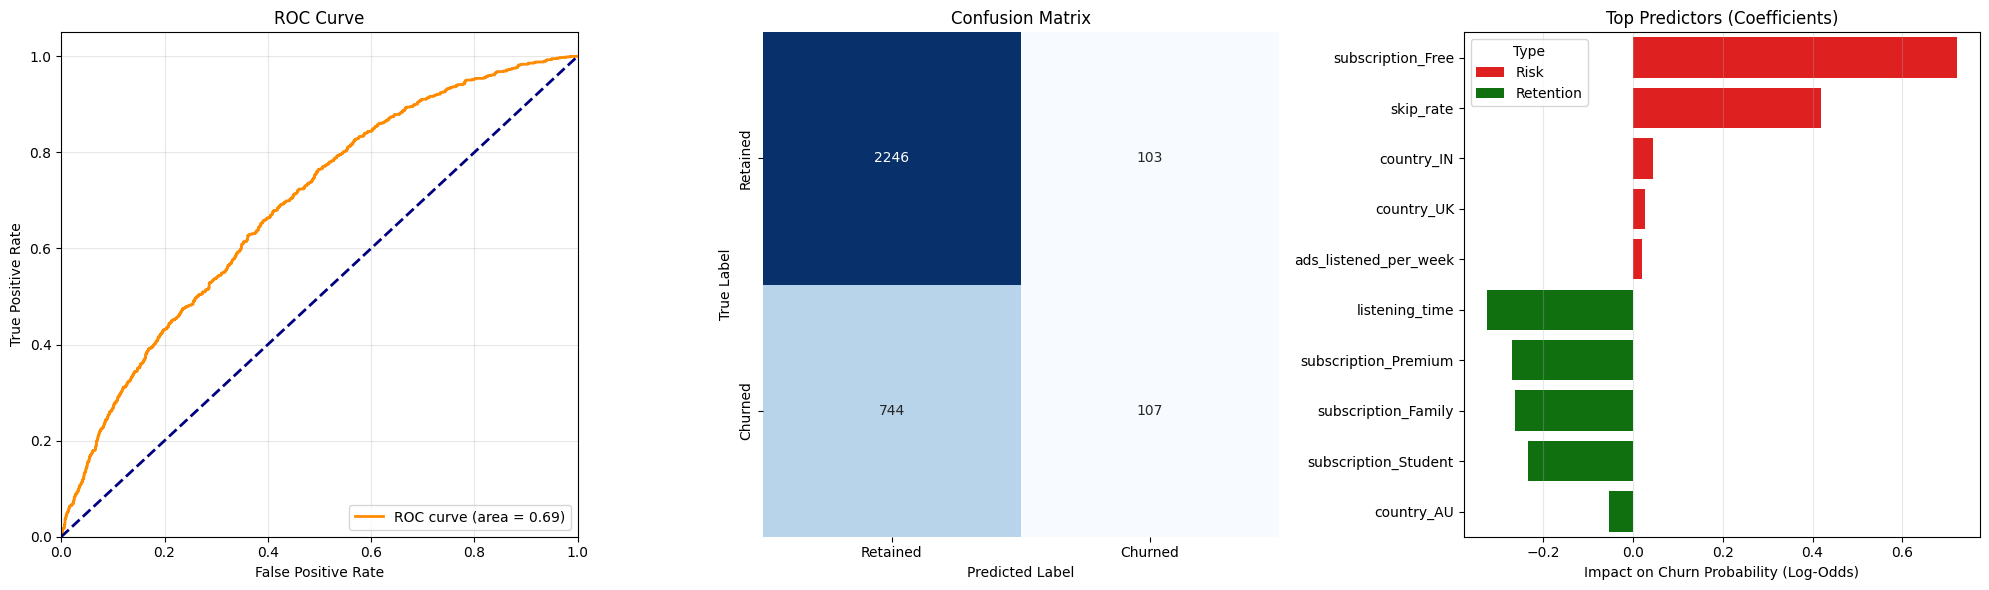

In [37]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import roc_curve, auc, confusion_matrix

# Set up  figure
fig, axes = plt.subplots(1, 3, figsize=(20, 6))

# ROC Curve
y_pred_prob = best_model.predict_proba(x_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
roc_auc = auc(fpr, tpr)

axes[0].plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
axes[0].plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
axes[0].set_xlim([0.0, 1.0])
axes[0].set_ylim([0.0, 1.05])
axes[0].set_xlabel('False Positive Rate')
axes[0].set_ylabel('True Positive Rate')
axes[0].set_title('ROC Curve')
axes[0].legend(loc="lower right")
axes[0].grid(True, alpha=0.3)

#  Confusion Matrix
y_pred = best_model.predict(x_test)
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', ax=axes[1], cbar=False)
axes[1].set_title('Confusion Matrix')
axes[1].set_xlabel('Predicted Label')
axes[1].set_ylabel('True Label')
axes[1].set_xticklabels(['Retained', 'Churned'])
axes[1].set_yticklabels(['Retained', 'Churned'])


if 'coef_df' not in locals():
    coefs = best_model.coef_[0]
    feature_names = churn_features_transformed_df.columns
    coef_df = pd.DataFrame({'feature': feature_names, 'coef': coefs})

#  top 5 positive top 5 negative features
top_risk = coef_df.sort_values(by='coef', ascending=False).head(5)
top_retention = coef_df.sort_values(by='coef', ascending=True).head(5)
plot_df = pd.concat([top_risk, top_retention])

# Add a 'Type' column for coloring
plot_df['Type'] = ['Risk' if c > 0 else 'Retention' for c in plot_df['coef']]

# Red for Risk, Green for Retention
palette = {'Risk': 'red', 'Retention': 'green'}

sns.barplot(x='coef', y='feature', data=plot_df, hue='Type', palette=palette, ax=axes[2])
axes[2].set_title('Top Predictors (Coefficients)')
axes[2].set_xlabel('Impact on Churn Probability (Log-Odds)')
axes[2].set_ylabel('')
axes[2].grid(axis='x', alpha=0.3)

plt.tight_layout()
plt.show()